In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #visualization
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,15)

In [2]:
# additional imports:
import seaborn as sns
import re
import sys
from time import sleep
from tqdm.notebook import tqdm
import warnings;
warnings.filterwarnings('ignore');

In [3]:
df = pd.read_csv("../input/bengaluru-house-price-data/Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning:

Lets check the null or nan values

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#Remove unnecessary columns 
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df1.shape

(13320, 5)

In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1 = df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
# lets check 'size' column
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here we need numeric values, so we will remove bedroom and BHK strings from all values.

In [14]:
# FUNCTION to remove string from row values.
# Nan values will be replaced by 0
def remove_string(x):
    x = str(x)
    if x == 'nan':
        x = np.NaN
    else:
        x = int(x.split(" ")[0])
    return x

In [15]:
# We create new column for the cleaned values of size column:
df1['BHK'] = df1['size'].apply(lambda x: remove_string(x))

In [16]:
df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df1[df1.BHK > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [19]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There are some values in range format. like 1133-1384

In [20]:
# Function to catch all non numeric and abnormal values:
def catch_abnormal_val(series):
    err_val = []
    for x in series:
        try:
            float(x)
        except:
            err_val.append(x)
    return err_val

In [21]:
catch_abnormal_val(df1['total_sqft'])

['2100 - 2850',
 '3067 - 8156',
 '1042 - 1105',
 '1145 - 1340',
 '1015 - 1540',
 '34.46Sq. Meter',
 '1195 - 1440',
 '4125Perch',
 '1120 - 1145',
 '3090 - 5002',
 '1160 - 1195',
 '1000Sq. Meter',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '650 - 665',
 '633 - 666',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '716Sq. Meter',
 '547.34 - 827.31',
 '580 - 650',
 '3425 - 3435',
 '1804 - 2273',
 '3630 - 3800',
 '4000 - 5249',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '361.33Sq. Yards',
 '645 - 936',
 '2710 - 3360',
 '2830 - 2882',
 '596 - 804',
 '1255 - 1863',
 '1300 - 1405',
 '117Sq. Yards',
 '934 - 1437',
 '980 - 1030',
 '2249.81 - 4112.19',
 '1070 - 1315',
 '3040Sq. Meter',
 '500Sq. Yards',
 '2806 - 3019',
 '613 - 648',
 '704 - 730',
 '1210 - 1477',
 '3369 - 3464',
 '1125 - 1500',
 '167Sq. Meter',
 '1076 - 1199',
 '381 - 535',
 '524 - 894',
 

Not just range values, we can see there are some numeric values written in sqft, perch, acres, yards, cents and ground formats.

In [22]:
# Lets modify the range format values first:
# function that will identfy range format values and convert them to single float value:
def convert_rng_val(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2 #return float mean value of range
    try:
        return float(x) #return remaining values in float.
    except:
        return x #return other abnormal value as it is.

In [23]:
print(convert_rng_val('1200'))
print(convert_rng_val('1200-2349'))
print(convert_rng_val('1200sqft. Meter'))

1200.0
1774.5
1200sqft. Meter


* sq Meters to sqft: 10.764 * sq.meters
* sqYards to sqft: 9 * sqYards
* gunta to sqft: 1089 * gunta
* acres to sqft: 43560 * acres
* perch to sqft: 272.25 * perch
* Grounds to sqft: 2400 * ground
* Cents to sqft: 435.6 * cent

In [24]:
def sqmt_to_sqft(x):
    """convert sq.meters to sqft"""
    return x * 10.764

def sqyards_to_sqft(x):
    """convert sq.yards to sqft"""
    return x * 9

def gunta_to_sqft(x):
    """convert gunta to sqft"""
    return x * 1089

def acres_to_sqft(x):
    """convert acres to sqft"""
    return x * 43560

def perch_to_sqft(x):
    """convert perch to sqft"""
    return x * 272.25

def grounds_to_sqft(x):
    """convert grounds to sqft"""
    return x * 2400

def cents_to_sqft(x):
    """convert cents to sqft"""
    return x * 435.6

All functions are ready now will make one parent function to clean our 'total_sqft' column

In [25]:
def clean_total_sqft(y):
    try:
        y = float(y)
    except:
        if "-" in y:
            y = round(convert_rng_val(y),1)
        elif "Sq. Meter" in y:
            y = round(sqmt_to_sqft(float(re.findall('\d+',y)[0])),1)
        elif "Sq. Yards" in y:
            y = sqyards_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Guntha" in y:
            y = gunta_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Acres" in y:
            y = acres_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Perch" in y:
            y = perch_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Grounds" in y:
            y = grounds_to_sqft(float(re.findall('\d+',y)[0])) 
        elif "Cents" in y:
            y = round(cents_to_sqft(float(re.findall('\d+',y)[0])),1)
        return y
    return y

In [26]:
clean_total_sqft("13Sq. Yards")

117.0

In [27]:
# Lets clean our column and create a cleaned version of it:
df1['total_sqft_cleaned'] = df1['total_sqft'].apply(lambda x : clean_total_sqft(x))
# lets check for abnormal values now :
catch_abnormal_val(df1['total_sqft_cleaned'])

[]

In [28]:
# Remove unecessary columns:
df2 = df1.drop(['size','total_sqft'], axis=1)

All columns are cleaned and no nan values remaining.
Now we can proceed to feature engineering.

In [29]:
df2.head()

,location,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


## Feature Engineering

In [30]:
df3 = df2.copy()

In [31]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [32]:
len(df3['location'].unique())

1304

In [33]:
#Lets check number of classes in each categorical columns:
categorical_cols = df3.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f'Number of classes in {col} : {df2[col].nunique()}')

Number of classes in location : 1304


In [34]:
# Creating new feature for detecting outliers:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft_cleaned']
df3.head()

,location,bath,price,BHK,total_sqft_cleaned,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [35]:
# Checking location statistics:
df3['location'] = df3['location'].apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

We will tag the locations which are having very less counts as others.

In [36]:
# Locations with less than 10 count:
locations_stats_less_than_10 = location_stats[location_stats<=10]
locations_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [37]:
df3['location'] = df3['location'].apply(lambda x : "other" if x in locations_stats_less_than_10 else x)

In [38]:
df3['location'].nunique()

242

The unique values have been reduced.

Now we will detect and remove outliers first. Suppose we have a threshold value for per room sqft given by realestate expert. 
Using this we can find out anomalies in our data and remove them.

In [39]:
# Per room sqft threshold be 300sqft: 
df3 = df3[~(df3.total_sqft_cleaned/df3.BHK < 300)]
df3.shape

(12498, 6)

In [40]:
df3['price_per_sqft'].describe()

count     12498.000000
mean       6298.937463
std        4169.116547
min           2.257423
25%        4203.458878
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

For normal distribution of data, we will keep price values which are near to mean and std.
Outliers are all above mean+standard_deviation and below mean+standard_deviation.

In [41]:
# Function to remove outliers from price_per_sqft based on locations.
# As every location will have different price range.
def remove_price_outlier(df_in):
    df_out = pd.DataFrame()
    for key, subdf in df_in.groupby('location'):
        avg_price = np.mean(subdf.price_per_sqft)
        std_price = np.std(subdf.price_per_sqft)
        # data without outliers: 
        reduced_df = subdf[(subdf.price_per_sqft>(avg_price-std_price)) & (subdf.price_per_sqft<=(avg_price+std_price))]
        df_out =pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df4 = remove_price_outlier(df3)
df4.shape

(10268, 6)

It was found that in some rows price of 2BHK is very less than 1 BHK. So we  will remove outliers based on BHK for each location. That is we can remove those n BHK apartments whose price_per_sqft is less than mean price_per_sqft of n-1 BHK.

In [42]:
# Function to remove BHK outliers:
def remove_bhk_outliers(df_in):
    exclude_indices = np.array([])
    for location, location_subdf in df_in.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_subdf in df_in.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_subdf.price_per_sqft),
                'std':np.std(bhk_subdf.price_per_sqft),
                'count':bhk_subdf.shape[0]
            }
        for bhk, bhk_subdf in location_subdf.groupby('BHK'):
            stats = bhk_stats.get(bhk-1) #statistics of n-1 BHK
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_subdf[bhk_subdf.price_per_sqft<(stats['mean'])].index.values)
    return df_in.drop(exclude_indices, axis='index')
        
df5 = remove_bhk_outliers(df4)
df5.shape

(5361, 6)

Text(0, 0.5, 'Count')

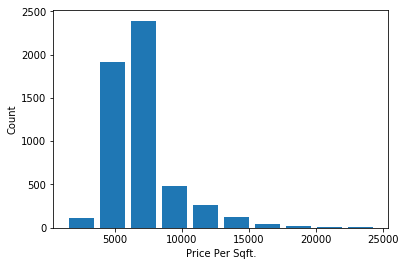

In [43]:
# Visualize to see number of data points for price_per_sqft
plt.hist(df5.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Sqft.")
plt.ylabel("Count")

In Data Cleaning section, we encountered that there exist number of bathrooms more than 10.
Lets tackle that in this section.

In [44]:
df5[df5.bath>10]

,location,bath,price,BHK,total_sqft_cleaned,price_per_sqft
8596,other,16.0,550.0,16,10000.0,5500.000000
9332,other,12.0,150.0,11,6000.0,2500.000000
9664,other,13.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'Count')

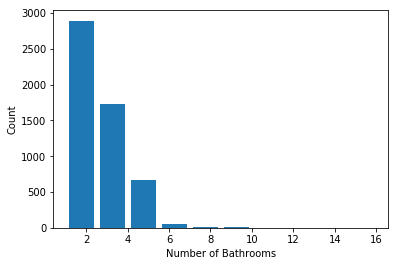

In [45]:
# Visualize to see data points based on number of bathrooms:
plt.hist(df5.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

We can consider the following for bathroom outlier, that **we cannot have (number of bathrooms) more than  (number of bedrooms)+2**

In [46]:
df5[df5.bath > df5.BHK+2]

,location,bath,price,BHK,total_sqft_cleaned,price_per_sqft
5252,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6727,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8431,other,9.0,1000.0,6,11338.0,8819.897689


These rows are our outliers for bathrooms.

In [47]:
# Remove bathroom outliers:
df6 = df5[df5.bath<df5.BHK+2]
df6.shape

(5293, 6)

In [48]:
df6.head()

,location,bath,price,BHK,total_sqft_cleaned,price_per_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668


Outliers removal is done. Now we can remove the extra column "price_per_sqft"

In [49]:
df7 = df6.drop(['price_per_sqft'], axis=1)
df7.head()

,location,bath,price,BHK,total_sqft_cleaned
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


As location variable is an categorical feature, we will create dummy columns for location feature using get dummies function.

In [50]:
location_dummies = pd.get_dummies(df7.location)
location_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As this generated binary columns of locations, it is obvious that if any one the row value is 1 then rest are 0. So we will remove one column.
Whenever there are N classes in a feature, we keep N-1 dummies for it. Here we will drop 'other' column

In [51]:
df8 = pd.concat([df7, location_dummies.drop('other', axis='columns')], axis='columns')
df8.head()

,location,bath,price,BHK,total_sqft_cleaned,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Remove Location Column:
df9 = df8.drop(['location'], axis='columns')
df9.head()

,bath,price,BHK,total_sqft_cleaned,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df9.shape

(5293, 223)

Feature engineering is done. We are now at 9th pipe stage and can proceed further for Prediction model building.

## Model Building
### Data Spliting: (Independent: X, Dependent:y) 

In [54]:
# Independent variables:
X = df9.drop('price', axis='columns')
X.head()

,bath,BHK,total_sqft_cleaned,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Dependent Variable:
y = df9['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Data Spliting: (train and test)
(X_train, y_train, X_test, y_test)

We will keep 20% of sample data for test and rest for training.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [57]:
# Linear Regression: 
from  sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'Score: {lin_reg.score(X_test, y_test)}')

Score: -709073351246840.0


In [58]:
# K-fold validation for Linear Regression:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv1)

array([ 8.54956042e-01,  8.64952627e-01,  8.67249433e-01,  8.43950296e-01,
       -1.85521577e+12])

## Model Selection and Parameter Tuning

Using GridSearch lets find out best model among Linear reg, Lasso reg, DecisionTree reg

In [59]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={}

In [61]:
def find_best_model_grid_search(X, Y, tqdm=tqdm):
    algos = {
        'Linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'normalize':[True, False]
             }
          },  
         'Lasso' : {
             'model': Lasso(),
             'params': {
                 'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 1,2],
                 'selection':['random', 'cyclic']
             }
          },
         'Ridge' : {
             'model' : Ridge(),
             'params': {
                 'alpha': [0.1, 1.0, 10.0, 200, 230, 250,265, 270, 275, 290, 300, 500]
             }
         },
          'Decision_tree': {
              'model': DecisionTreeRegressor(),
              'params': {
                  'criterion' : ['mse', 'friedman_mse'],
                  'splitter': ['best', 'random']
              }
          }
    }
    values = (algos.items())
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    print(f'Grid Search CV Initiated..' )    
    with tqdm(total=len(values), file=sys.stdout) as pbar:
        for algo_name, config in algos.items():
            pbar.set_description('Processed')
            gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X,Y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
            pbar.update(1)
            print(f'Grid search CV for {algo_name} done')
        print("Grid Search CV completed!")
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [62]:
models = find_best_model_grid_search(X, y)
models

Grid Search CV Initiated..


Grid search CV for Linear_regression done
Grid search CV for Lasso done
Grid search CV for Ridge done
Grid search CV for Decision_tree done
Grid Search CV completed!



,model,best_score,best_params
0,Linear_regression,-3.710432e+11,{'normalize': False}
1,Lasso,8.440718e-01,"{'alpha': 0.02, 'selection': 'random'}"
2,Ridge,8.486443e-01,{'alpha': 0.1}
3,Decision_tree,7.980441e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Clearly, we can see Lasso is performing well.Lasso and Ridge are actually any other regression model. They are regularization methods of linear regressions.
To know more about Lasso and Ridge:https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ .
Lets collect its best parameters and proceed to re-train our model using these parameters

In [63]:
# Ridge best parameters:
models.loc[2]['best_params']

{'alpha': 0.1}

In [64]:
# Re-train using best parameter:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
# Prediction:
ypred = model.predict(X_test)

Text(0, 0.5, 'Actual Price')

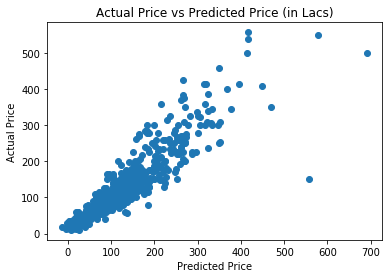

In [66]:
# Visualising the test vs predicted data:
plt.scatter(ypred, y_test)
plt.title('Actual Price vs Predicted Price (in Lacs)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [67]:
# Calculate the absolute errors
errors = abs(ypred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 19.25 degrees.


In [68]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.31 %.


In [69]:
X.columns

Index(['bath', 'BHK', 'total_sqft_cleaned', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Varthur', 'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=222)

In [70]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
bath,4.278776
BHK,3.133470
total_sqft_cleaned,0.082673
1st Block Jayanagar,128.256492
1st Phase JP Nagar,13.493155
...,...
Whitefield,-21.682474
Yelachenahalli,-20.648192
Yelahanka,-24.994088
Yelahanka New Town,-16.035251


Our Model is ready!! 

## Predictions

In [71]:
# Prediction Function
def predict_price(location, sqft, bath, bhk, data=X):
    loc_index = np.where(data.columns==location)[0][0]
    x = np.zeros(len(data.columns)) #init a new array with zero values.
    x[0] = bath
    x[1] = bhk
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [72]:
predict_price('1st Phase JP Nagar',1000,2,2)

86.04857260985531

In [73]:
# Indira Nagar is most expensive in Bengaluru. Lets predict
predict_price('Indira Nagar',1000,2,2)

157.62098474877905

In [74]:
location = input('Enter location name: ')
sqft = int(input('Enter total area in sqft: '))
bhk = int(input('Enter BHK: '))
bath = int(input('Enter no. of bathroom: '))
print(f'Predicted Price is {round(predict_price(location,sqft,bhk,bath), 2)} Lakh.')

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

## Saving Model

In [75]:
# saving ml model as pickle file:
import pickle
with open('bengaluru_home_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [76]:
# saving column names as a json file:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

Done!!